In [122]:
import plotly.express as plx
import matplotlib.pyplot as plt

import pandas as pd
import os 
import warnings
import numpy as np
import time
import seaborn as sns
warnings.filterwarnings('ignore')


In [4]:
df_2k16 = pd.read_csv(r'D:\Self Learning\Research Engineering Intern Assignment  Mental Health in Tech\archive\OSMI Mental Health in Tech Survey 2016.csv')
df_2k17 = pd.read_csv(r'D:\Self Learning\Research Engineering Intern Assignment  Mental Health in Tech\archive\OSMI Mental Health in Tech Survey 2017.csv')
df_2k18 = pd.read_csv(r'D:\Self Learning\Research Engineering Intern Assignment  Mental Health in Tech\archive\OSMI Mental Health in Tech Survey 2018.csv')
df_2k19 = pd.read_csv(r'D:\Self Learning\Research Engineering Intern Assignment  Mental Health in Tech\archive\OSMI Mental Health in Tech Survey 2019.csv')
df_2k20 = pd.read_csv(r'D:\Self Learning\Research Engineering Intern Assignment  Mental Health in Tech\archive\OSMI Mental Health in Tech Survey 2020.csv')
# hard coded

In [5]:
alll = [df_2k16,df_2k17,df_2k18,df_2k19,df_2k20]



In [6]:
def view_shape():
    for df in alll:
        print(df.shape)

In [7]:
def view_columns():
    
    for df in alll:
     print(df.shape)

    Column_by_year = {}

    cnt = 16
    for df in alll:
        t = len(df.columns)
        print(f"\n Data for  year {cnt} with ({t} total):  Columns\n" + "-"*50)
        Column_by_year["df_2k"+str(cnt)] = t

        cnt+=1
        for col in df.columns:
             print(f"  - {col}")

    return Column_by_year

# View Columns in all Dataframes

In [8]:
view_columns()

(1433, 63)
(756, 123)
(417, 123)
(352, 82)
(180, 120)

 Data for  year 16 with (63 total):  Columns
--------------------------------------------------
  - Are you self-employed?
  - How many employees does your company or organization have?
  - Is your employer primarily a tech company/organization?
  - Is your primary role within your company related to tech/IT?
  - Does your employer provide mental health benefits as part of healthcare coverage?
  - Do you know the options for mental health care available under your employer-provided coverage?
  - Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?
  - Does your employer offer resources to learn more about mental health concerns and options for seeking help?
  - Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources provided by your employer?
  - If a mental health issue prompted you to reque

{'df_2k16': 63, 'df_2k17': 123, 'df_2k18': 123, 'df_2k19': 82, 'df_2k20': 120}

In [9]:
df_2k18['Is your primary role within your company related to tech/IT?'].unique()

array([ 0.,  1., nan])

In [10]:
df_2k17['Psychotic Disorder (Schizophrenia, Schizoaffective, etc).1'].unique()

array([nan])

In [11]:
df_2k18['Describe the conversation you had with your employer about your mental health, including their reactions and what actions were taken to address your mental health issue/questions.']

0      I informed my employer that I was very sick du...
1                                                    NaN
2                                                    NaN
3                                                    NaN
4      "Hey, I have a lot of anxiety sometimes."  "Oh...
                             ...                        
412                                                  NaN
413                                                  NaN
414                                                  NaN
415    Supportive. They understood what I was going t...
416                                                  NaN
Name: Describe the conversation you had with your employer about your mental health, including their reactions and what actions were taken to address your mental health issue/questions., Length: 417, dtype: object

In [12]:
import re

def strip_html_tags(text):
    text = re.sub(r'\*+', '', text)  
    text = re.sub(r'\?.*', '', text)  # Remove everything after and including '?'
    text =  re.sub(r'<[^>]+>', '', text)
    return text.strip()
  


print(strip_html_tags("What country do you <strong>live</strong> in?"))
print(strip_html_tags("What country do you <st>live</strong> in?"))
print(strip_html_tags("Do you *currently* have a mental health disorder? "))


What country do you live in
What country do you live in
Do you currently have a mental health disorder


In [13]:
for df in alll:
   
    new_columns = {col: strip_html_tags(col) for col in df.columns}
    
    df.rename(columns=new_columns, inplace=True)
      

The null size is for columns is  different for different  years.

**First Selecting the good features enough for analysis and droping the highest null columns**

In [14]:
print(view_columns())

(1433, 63)
(756, 123)
(417, 123)
(352, 82)
(180, 120)

 Data for  year 16 with (63 total):  Columns
--------------------------------------------------
  - Are you self-employed
  - How many employees does your company or organization have
  - Is your employer primarily a tech company/organization
  - Is your primary role within your company related to tech/IT
  - Does your employer provide mental health benefits as part of healthcare coverage
  - Do you know the options for mental health care available under your employer-provided coverage
  - Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)
  - Does your employer offer resources to learn more about mental health concerns and options for seeking help
  - Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources provided by your employer
  - If a mental health issue prompted you to request a medi

In [15]:

for df in alll:
    print(df.columns[df.columns.duplicated()])
    df.drop(columns=df.columns[df.columns.duplicated()] , inplace =True)
    


Index(['Why or why not'], dtype='object')
Index(['Why or why not'], dtype='object')
Index(['Why or why not'], dtype='object')
Index(['Why or why not'], dtype='object')
Index(['Why or why not'], dtype='object')


# View Null Columns

In [16]:
cnt = 16
for df in alll:
    t = len(df.columns)
    print(f"\n Data for  year {cnt} with ({t} total):  Columns\n" + "-" * 50)


    cnt += 1

    # Print column names and null counts
    for col in df.columns:
     
        null_p = ((df[col].isna().sum() / df[col].shape[0]) * 100)

        print(f"  - {col} (Null/NaN Count: {null_p})")


 Data for  year 16 with (61 total):  Columns
--------------------------------------------------
  - Are you self-employed (Null/NaN Count: 0.0)
  - How many employees does your company or organization have (Null/NaN Count: 20.02791346824843)
  - Is your employer primarily a tech company/organization (Null/NaN Count: 20.02791346824843)
  - Is your primary role within your company related to tech/IT (Null/NaN Count: 81.64689462665736)
  - Does your employer provide mental health benefits as part of healthcare coverage (Null/NaN Count: 20.02791346824843)
  - Do you know the options for mental health care available under your employer-provided coverage (Null/NaN Count: 29.309141660851363)
  - Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication) (Null/NaN Count: 20.02791346824843)
  - Does your employer offer resources to learn more about mental health concerns and options for seeking help (Null/NaN Count: 20.

In [17]:

removed_list =  {}

cnt = 16
for i,df in enumerate(alll):
    removed_list["2k"+str(cnt)] = []
    for col in df.columns:

        
        null_p = ((df[col].isna().sum() / df[col].shape[0]) * 100)
        
        print(f"  - {col} (Null/NaN Count: {null_p})      for year 2k{cnt}    ")
        if null_p >45:
            print(f"removing column {col} as null > 45%")
            removed_list["2k"+str(cnt)].append(col + "with null"+str(null_p))
            df.drop(col, axis=1,inplace=True)
            
        alll[i] = df
    cnt+=1


  - Are you self-employed (Null/NaN Count: 0.0)      for year 2k16    
  - How many employees does your company or organization have (Null/NaN Count: 20.02791346824843)      for year 2k16    
  - Is your employer primarily a tech company/organization (Null/NaN Count: 20.02791346824843)      for year 2k16    
  - Is your primary role within your company related to tech/IT (Null/NaN Count: 81.64689462665736)      for year 2k16    
removing column Is your primary role within your company related to tech/IT as null > 45%
  - Does your employer provide mental health benefits as part of healthcare coverage (Null/NaN Count: 20.02791346824843)      for year 2k16    
  - Do you know the options for mental health care available under your employer-provided coverage (Null/NaN Count: 29.309141660851363)      for year 2k16    
  - Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication) (Null/NaN Count: 20.02791346824843) 

In [18]:
view_shape()

(1433, 48)
(756, 61)
(417, 61)
(352, 57)
(180, 55)


In [19]:
print(removed_list)

{'2k16': ['Is your primary role within your company related to tech/ITwith null81.64689462665736', 'Do you have medical coverage (private insurance or state-provided) which includes treatment of \xa0mental health issueswith null79.97208653175157', 'Do you know local or online resources to seek help for a mental health disorderwith null79.97208653175157', 'If you have been diagnosed or treated for a mental health disorder, do you ever reveal this to clients or business contactswith null79.97208653175157', 'If you have revealed a mental health issue to a client or business contact, do you believe this has impacted you negativelywith null89.95115143056525', 'If you have been diagnosed or treated for a mental health disorder, do you ever reveal this to coworkers or employeeswith null79.97208653175157', 'If you have revealed a mental health issue to a coworker or employee, do you believe this has impacted you negativelywith null79.97208653175157', 'Do you believe your productivity is ever a

**removed ones are**

In [20]:
for key, val in removed_list.items():
    print(f"data == {key}\n" + "\n".join(f"  - {col}" for col in val) )


data == 2k16
  - Is your primary role within your company related to tech/ITwith null81.64689462665736
  - Do you have medical coverage (private insurance or state-provided) which includes treatment of  mental health issueswith null79.97208653175157
  - Do you know local or online resources to seek help for a mental health disorderwith null79.97208653175157
  - If you have been diagnosed or treated for a mental health disorder, do you ever reveal this to clients or business contactswith null79.97208653175157
  - If you have revealed a mental health issue to a client or business contact, do you believe this has impacted you negativelywith null89.95115143056525
  - If you have been diagnosed or treated for a mental health disorder, do you ever reveal this to coworkers or employeeswith null79.97208653175157
  - If you have revealed a mental health issue to a coworker or employee, do you believe this has impacted you negativelywith null79.97208653175157
  - Do you believe your productivity

Removing typos

In [21]:
print(view_columns())

(1433, 48)
(756, 61)
(417, 61)
(352, 57)
(180, 55)

 Data for  year 16 with (48 total):  Columns
--------------------------------------------------
  - Are you self-employed
  - How many employees does your company or organization have
  - Is your employer primarily a tech company/organization
  - Does your employer provide mental health benefits as part of healthcare coverage
  - Do you know the options for mental health care available under your employer-provided coverage
  - Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)
  - Does your employer offer resources to learn more about mental health concerns and options for seeking help
  - Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources provided by your employer
  - If a mental health issue prompted you to request a medical leave from work, asking for that leave would be:
  - Do you thi

# Comparing
**Comparing the Important features   present in all years. This will help to understand 
how to fill missing values and determinie features that are dominatiing in which year**

In [22]:
required_columns = [
    # 1. Sentiment Analysis (Free-text columns)
    "Briefly describe what you think the industry as a whole and/or employers could do to improve mental health support for employees.",
    
    # 2. Workplace Mental Health Trends
    # a. Prevalence of Mental Health Conditions
    "Do you currently have a mental health disorder",
    "Have you been diagnosed with a mental health condition by a medical professional",
    "Have you had a mental health disorder in the past",
    
    # b. Workplace Support
    "Does your employer provide mental health benefits as part of healthcare coverage",
    "Does your employer offer resources to learn more about mental health concerns and options for seeking help",
    "Does your employer offer resources to learn more about mental health disorders and options for seeking help",
    "Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)",
    "Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources provided by your employer",
    
    # c. Comfort Discussing Mental Health
    "Would you feel comfortable discussing a mental health disorder with your direct supervisor(s)",
    "Would you feel comfortable discussing a mental health issue with your direct supervisor(s)",
    "Would you feel comfortable discussing a mental health disorder with your coworkers",
    "Would you feel comfortable discussing a mental health issue with your coworkers",
    "Have you ever discussed your mental health with your employer",
    "Have you ever discussed your mental health with coworkers",
    
    # d. Policy Awareness
    "Do you know the options for mental health care available under your employer-provided coverage",
    "Do you know the options for mental health care available under your employer-provided health coverage",
    "Were you aware of the options for mental health care provided by your previous employers",
    
    # e. Productivity and Work Interference
    "If you have a mental health issue, do you feel that it interferes with your work when being treated effectively",
    "If you have a mental health issue, do you feel that it interferes with your work when NOT being treated effectively",
    "If you have a mental health disorder, how often do you feel that it interferes with your work when being treated effectively",
    "If you have a mental health disorder, how often do you feel that it interferes with your work when NOT being treated effectively (i.e., when you are experiencing symptoms)",
    "If you have a mental health disorder, how often do you feel that it interferes with your work when _NOT_ being treated effectively (i.e., when you are experiencing symptoms)",
    
    # 3. Demographic Insights
    "What is your age",
    "What is your gender",
    "What country do you work in",
    "What US state or territory do you work in",
    "Which of the following best describes your work position",
    "Do you work remotely",
    "What is your race",
    
    # 4. Company and Employment Details
    "Are you self-employed",
    "How many employees does your company or organization have",
    "Is your employer primarily a tech company/organization",
    "Is your primary role within your company related to tech/IT",
    "Do you have previous employers",
    "Have your previous employers provided mental health benefits",
    
    # 5. Workplace culture and attitudes
    "Do you feel that your employer takes mental health as seriously as physical health",
    "Did you feel that your previous employers took mental health as seriously as physical health",
    "Have you heard of or observed negative consequences for co-workers who have been open about mental health issues in your workplace",
    "Have you observed or experienced an unsupportive or badly handled response to a mental health issue in your current or previous workplace",
    "Have you observed or experienced a supportive or well handled response to a mental health issue in your current or previous workplace",
    "Overall, how well do you think the tech industry supports employees with mental health issues",
    
    # 6. Treatment and Diagnosis
    "Have you ever sought treatment for a mental health issue from a mental health professional",
    "Have you ever sought treatment for a mental health disorder from a mental health professional",
    "Do you have a family history of mental illness",
    "Are you openly identified at work as a person with a mental health issue",
    "If they knew you suffered from a mental health disorder, how do you think that team members/co-workers would react",
    "If they knew you suffered from a mental health disorder, how do you think that your team members/co-workers would react"
]

In [23]:
column_mapping = {col: [] for col in required_columns}

In [24]:
def check_column_presence(df, df_name, column_mapping):
    for col in column_mapping:
        if col in df.columns:
            column_mapping[col].append(df_name)
    return column_mapping


column_mapping = check_column_presence(alll[0], 'df_2k16', column_mapping)
column_mapping = check_column_presence(alll[1], 'df_2k17', column_mapping)
column_mapping = check_column_presence(alll[2], 'df_2k18', column_mapping)
column_mapping = check_column_presence(alll[3], 'df_2k19', column_mapping)
column_mapping = check_column_presence(alll[4], 'df_2k20', column_mapping)

In [25]:
column_mapping

{'Briefly describe what you think the industry as a whole and/or employers could do to improve mental health support for employees.': ['df_2k17',
  'df_2k18',
  'df_2k19',
  'df_2k20'],
 'Do you currently have a mental health disorder': ['df_2k16',
  'df_2k17',
  'df_2k18',
  'df_2k19',
  'df_2k20'],
 'Have you been diagnosed with a mental health condition by a medical professional': ['df_2k16'],
 'Have you had a mental health disorder in the past': ['df_2k16',
  'df_2k17',
  'df_2k18',
  'df_2k19',
  'df_2k20'],
 'Does your employer provide mental health benefits as part of healthcare coverage': ['df_2k16',
  'df_2k18',
  'df_2k19',
  'df_2k20'],
 'Does your employer offer resources to learn more about mental health concerns and options for seeking help': ['df_2k16'],
 'Does your employer offer resources to learn more about mental health disorders and options for seeking help': ['df_2k17',
  'df_2k18',
  'df_2k19',
  'df_2k20'],
 'Has your employer ever formally discussed mental healt

In [26]:
view_shape()

(1433, 48)
(756, 61)
(417, 61)
(352, 57)
(180, 55)


In [27]:

removed_columns = [
    col for col in required_columns 
    if len(column_mapping.get(col, [])) <= 2
]
print("Columns removed (appear in ≤2 dataframes):", removed_columns)

Columns removed (appear in ≤2 dataframes): ['Have you been diagnosed with a mental health condition by a medical professional', 'Does your employer offer resources to learn more about mental health concerns and options for seeking help', 'Would you feel comfortable discussing a mental health disorder with your direct supervisor(s)', 'Would you feel comfortable discussing a mental health disorder with your coworkers', 'Do you know the options for mental health care available under your employer-provided coverage', 'If you have a mental health issue, do you feel that it interferes with your work when being treated effectively', 'If you have a mental health issue, do you feel that it interferes with your work when NOT being treated effectively', 'If you have a mental health disorder, how often do you feel that it interferes with your work when NOT being treated effectively (i.e., when you are experiencing symptoms)', 'If you have a mental health disorder, how often do you feel that it int

In [28]:
len(removed_columns)

18

In [29]:
len(column_mapping)

48

In [30]:
# Filter required_columns to only keep columns present in 3+ dataframes
required_columns = [
    col for col in required_columns 
    if len(column_mapping.get(col, [])) > 2
]

In [31]:
len(required_columns)

30

In [32]:
required_columns

['Briefly describe what you think the industry as a whole and/or employers could do to improve mental health support for employees.',
 'Do you currently have a mental health disorder',
 'Have you had a mental health disorder in the past',
 'Does your employer provide mental health benefits as part of healthcare coverage',
 'Does your employer offer resources to learn more about mental health disorders and options for seeking help',
 'Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)',
 'Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources provided by your employer',
 'Would you feel comfortable discussing a mental health issue with your direct supervisor(s)',
 'Would you feel comfortable discussing a mental health issue with your coworkers',
 'Have you ever discussed your mental health with your employer',
 'Have you ever discussed your ment

In [33]:
required_columns = [
    # 1. SENTIMENT ANALYSIS (Free-text responses)
    'Briefly describe what you think the industry as a whole and/or employers could do to improve mental health support for employees.',
    # Only available free-text column for sentiment analysis
    
    # 2. MENTAL HEALTH PREVALENCE & DIAGNOSIS
    'Do you currently have a mental health disorder',                  # Current mental health status
    'Have you had a mental health disorder in the past',    # Historical mental health status
    
    # 3. WORKPLACE SUPPORT & POLICIES

    'Does your employer provide mental health benefits as part of healthcare coverage',          # Benefits availability
    'Does your employer offer resources to learn more about mental health disorders and options for seeking help',  # Educational resources

    'Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)',  # Mental health awareness
    
    'Do you know the options for mental health care available under your employer-provided health coverage',  # Policy awareness
    'Were you aware of the options for mental health care provided by your previous employers',  # Historical policy awareness
    
    # 4. COMFORT DISCUSSING MENTAL HEALTH
    'Would you feel comfortable discussing a mental health issue with your direct supervisor(s)',  # Supervisor comfort level
    'Would you feel comfortable discussing a mental health issue with your coworkers',            # Peer comfort level

    
    # 5. WORK IMPACT & PRODUCTIVITY
    
    'Have you observed or experienced an unsupportive or badly handled response to a mental health issue in your current or previous workplace',  # Negative experiences
    'Overall, how well do you think the tech industry supports employees with mental health issues',  # Industry perception
    
    # 6. DEMOGRAPHICS
    'What is your age',                          # Age distribution
    'What is your gender',                       # Gender analysis
    'What is your race',                         # Racial demographics
    'What country do you work in',               # Geographic location

    # 7. COMPANY CHARACTERISTICS
    'Are you self-employed',                                     # Employment type
    'How many employees does your company or organization have', # Company size
    'Is your employer primarily a tech company/organization',    # Industry sector
    'Is your primary role within your company related to tech/IT',  # Job function
    
]

# Filtering DF for Seleted Features

In [34]:
available_cols = df_2k16.columns.intersection(required_columns)

Year_16 = df_2k16[available_cols]
available_cols = df_2k17.columns.intersection(required_columns)
Year_17 = df_2k17[available_cols]
available_cols = df_2k18.columns.intersection(required_columns)
Year_18 = df_2k18[available_cols]
available_cols = df_2k19.columns.intersection(required_columns)
Year_19 = df_2k19[available_cols]
available_cols = df_2k20.columns.intersection(required_columns)
Year_20 = df_2k20[available_cols]



In [35]:
print(Year_16.shape)
print(Year_17.shape)
print(Year_18.shape)
print(Year_19.shape)
print(Year_20.shape)

(1433, 12)
(756, 19)
(417, 20)
(352, 20)
(180, 19)


In [36]:
Year_16.columns

Index(['Are you self-employed',
       'How many employees does your company or organization have',
       'Is your employer primarily a tech company/organization',
       'Does your employer provide mental health benefits as part of healthcare coverage',
       'Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)',
       'Were you aware of the options for mental health care provided by your previous employers',
       'Have you observed or experienced an unsupportive or badly handled response to a mental health issue in your current or previous workplace',
       'Have you had a mental health disorder in the past',
       'Do you currently have a mental health disorder', 'What is your age',
       'What is your gender', 'What country do you work in'],
      dtype='object')

In [37]:
Year_16['year'] = 2016

In [38]:
Year_16.head()

,Are you self-employed,How many employees does your company or organization have,Is your employer primarily a tech company/organization,Does your employer provide mental health benefits as part of healthcare coverage,"Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)",Were you aware of the options for mental health care provided by your previous employers,Have you observed or experienced an unsupportive or badly handled response to a mental health issue in your current or previous workplace,Have you had a mental health disorder in the past,Do you currently have a mental health disorder,What is your age,What is your gender,What country do you work in,year
0,0,26-100,1.0,Not eligible for coverage / N/A,No,N/A (not currently aware),No,Yes,No,39,Male,United Kingdom,2016
1,0,6-25,1.0,No,Yes,I was aware of some,No,Yes,Yes,29,male,United States of America,2016
2,0,6-25,1.0,No,No,N/A (not currently aware),Maybe/Not sure,Maybe,No,38,Male,United Kingdom,2016
3,1,NaN,NaN,NaN,NaN,N/A (not currently aware),No,Yes,Yes,43,male,United Kingdom,2016
4,0,6-25,0.0,Yes,No,N/A (not currently aware),"Yes, I experienced",Yes,Yes,43,Female,United States of America,2016


In [39]:
Year_17['year'] = 2017
Year_18['year'] = 2018
Year_19['year'] = 2019
Year_20['year'] = 2020

In [40]:
final_df = pd.concat([Year_16, Year_17, Year_18, Year_19, Year_20], axis=0)


In [41]:
final_df.shape

(3138, 21)

In [42]:
column_renaming = {
    # 1. SENTIMENT ANALYSIS
    'Briefly describe what you think the industry as a whole and/or employers could do to improve mental health support for employees.': 'mh_support_suggestions',
    
    # 2. MENTAL HEALTH PREVALENCE
    'Do you currently have a mental health disorder': 'current_mh_disorder',
    'Have you had a mental health disorder in the past': 'past_mh_disorder',
    
    # 3. WORKPLACE SUPPORT
    'Does your employer provide mental health benefits as part of healthcare coverage': 'mh_benefits',
    'Does your employer offer resources to learn more about mental health disorders and options for seeking help': 'mh_resources',
    'Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)': 'mh_discussed',
    'Do you know the options for mental health care available under your employer-provided health coverage': 'mh_options_aware',
    'Were you aware of the options for mental health care provided by your previous employers': 'prev_mh_options_aware',
    
    # 4. COMFORT DISCUSSING MH
    'Would you feel comfortable discussing a mental health issue with your direct supervisor(s)': 'comfort_supervisor',
    'Would you feel comfortable discussing a mental health issue with your coworkers': 'comfort_coworkers',
    
    # 5. WORK IMPACT
    'Have you observed or experienced an unsupportive or badly handled response to a mental health issue in your current or previous workplace': 'unsupportive_response',
    'Overall, how well do you think the tech industry supports employees with mental health issues': 'industry_support_rating',
    
    # 6. DEMOGRAPHICS
    'What is your age': 'age',
    'What is your gender': 'gender',
    'What is your race': 'race',
    'What country do you work in': 'work_country',
    
    # 7. COMPANY INFO
    'Are you self-employed': 'self_employed',
    'How many employees does your company or organization have': 'company_size',
    'Is your employer primarily a tech company/organization': 'tech_company',
    'Is your primary role within your company related to tech/IT': 'tech_role'
}

In [43]:
len(column_renaming)

20

In [44]:
final_df.rename(columns=column_renaming,inplace=True)

In [45]:
len(final_df.columns)

21

In [46]:
final_df.columns

Index(['self_employed', 'company_size', 'tech_company', 'mh_benefits',
       'mh_discussed', 'prev_mh_options_aware', 'unsupportive_response',
       'past_mh_disorder', 'current_mh_disorder', 'age', 'gender',
       'work_country', 'year', 'tech_role', 'mh_options_aware', 'mh_resources',
       'comfort_supervisor', 'comfort_coworkers', 'industry_support_rating',
       'mh_support_suggestions', 'race'],
      dtype='object')

# Commmon collumns

# Cleaning & Refining

In [48]:
final_df.nunique()

self_employed                 2
company_size                  6
tech_company                  2
mh_benefits                   5
mh_discussed                  3
prev_mh_options_aware         6
unsupportive_response         5
past_mh_disorder              5
current_mh_disorder           5
age                          60
gender                      156
work_country                 83
year                          5
tech_role                     2
mh_options_aware              2
mh_resources                  3
comfort_supervisor            3
comfort_coworkers             3
industry_support_rating       5
mh_support_suggestions     1155
race                         10
dtype: int64

In [49]:
final_df['self_employed'].unique()


array([0, 1])

In [50]:
def check_unique():
    for col in final_df.columns:
        if col == 'mh_support_suggestions' or 'race' or 'gender' or 'age':
            print(f" {col}   ===      {final_df[col].unique()}\n")

In [51]:
check_unique()

 self_employed   ===      [0 1]

 company_size   ===      ['26-100' '6-25' nan 'More than 1000' '100-500' '500-1000' '1-5']

 tech_company   ===      [1.0 nan 0.0]

 mh_benefits   ===      ['Not eligible for coverage / N/A' 'No' nan 'Yes' "I don't know"
 'Not eligible for coverage / NA']

 mh_discussed   ===      ['No' 'Yes' nan "I don't know"]

 prev_mh_options_aware   ===      ['N/A (not currently aware)' 'I was aware of some'
 'Yes, I was aware of all of them' 'No, I only became aware later' nan
 'N/A (was not aware)' 'N/A (none offered)']

 unsupportive_response   ===      ['No' 'Maybe/Not sure' 'Yes, I experienced' 'Yes, I observed' nan
 "I've always been self-employed"]

 past_mh_disorder   ===      ['Yes' 'Maybe' 'No' 'Possibly' nan "Don't Know"]

 current_mh_disorder   ===      ['No' 'Yes' 'Maybe' 'Possibly' "Don't Know"]

 age   ===      [ 39.  29.  38.  43.  42.  30.  37.  44.  28.  34.  35.  52.  32.  25.
  31.  26.  33.  27.  36.  40.  46.  41.  45.  19.  21.  24.  17.  23.

In [68]:
# --- Male (1) ---
male_terms = [
    'Male', 'male', 'Male ', 'M', 'm', 'man', 'Cis male', 'Male.', 
    'male 9:1 female, roughly', 'Male (cis)', 'Man', 'Sex is male',
    'cis male', 'Malr', 'Dude', 
    "I'm a man why didn't you make this a drop down question. You should of asked sex? And I would of answered yes please. Seriously how much text can this take? ",
    'mail', 'M|', 'male ', 'cisgender male', 'MAle', 'Cis Male',
    'Male (trans, FtM)', 'cis-male', 'Mail', 'cis hetero male',
    'cisdude', 'cis man', 'MALE', "male (hey this is the tech industry you're talking about)",
    'Cis-male', 'Male, cis', 'cis male ', 'Male-ish', 'dude',
    'male, born with xy chromosoms', 'Malel', 'Let\'s keep it simple and say "male"',
    'Identify as male', 'Masculine', 'cisgender male', 'I have a penis',
    'masculino', 'Make', 'CIS Male', 'mostly male','Ostensibly Male','Cisgender male','male/androgynous '
]
final_df['gender'].replace(to_replace=male_terms, value=1, inplace=True)

# --- Female (2) ---
female_terms = [
    'Female', 'female', 'I identify as female.', 'female ', 'F', 'Woman',
    'fm', 'f', 'Cis female ', 'Female ', 'woman', 'female/woman',
    'Cisgender Female', 'fem', 'Female (props for making this a freeform field, though)',
    ' Female', 'Cis-woman', 'AFAB', 'female (cis)', 'femalw', 'femail',
    'female (cisgender)', 'Female (cis) ', 'Woman-identified', 'cis-Female',
    'cis female', 'F, cisgender', 'Female-ish', 'trans woman', 'Transfeminine',
    'I identify as female', 'Female/gender non-binary.', 'Cis woman',
    'Female (cisgender)', 'Cis-Female', 'Cisgendered woman', 'Trans woman',
    'Trans female', 'cisgender female', 'Female-identified', 'cis woman',
    'femmina', 'FEMALE', 'female, she/her', 'Femile', 'Female (cis)',
    'She/her/they/them', 'My sex is female.', 'uhhhhhhhhh fem genderqueer?',
    'mtf', 'Genderfluid (born female)','Female assigned at birth ','Female or Multi-Gender Femme'
]
final_df['gender'].replace(to_replace=female_terms, value=2, inplace=True)

# --- Other (0) ---
other_terms = [
    'Bigender', 'non-binary', 'Other/Transfeminine', 'Androgynous', 'Other',
    'nb masculine', 'none of your business', 'genderqueer', 'Human',
    'Genderfluid', 'Enby', 'genderqueer woman', 'Queer', 'Agender', 'Fluid',
    'Nonbinary', 'human', 'Unicorn', 'Genderqueer', 'Genderflux demi-girl',
    'Transgender woman', 'God King of the Valajar', 'Non-binary',
    'Agender/genderfluid', 'sometimes', 'Contextual', 'Non binary',
    'Genderqueer demigirl', 'Genderqueer/non-binary', 'nonbinary', '\\-',
    '*shrug emoji* (F)', 'Male (or female, or both)', 'Trans man', 'transgender',
    'non binary', 'genderfluid', 'Demiguy', 'none', 'NB', 'Nonbinary/femme',
    'gender non-conforming woman', 'Cishet male', 'agender', 'Questioning',
    'rr', 'Agender trans woman', '43', 'I am a Wookie', 'Trans non-binary/genderfluid',
    'Non-binary and gender fluid', 'Male/genderqueer', 'female-bodied; no feelings about gender','SWM','Transitioned, M2F'
]
final_df['gender'].replace(to_replace=other_terms, value=0, inplace=True)

# Handle NaN (if any)
final_df['gender'].fillna(0, inplace=True)

In [69]:
final_df['gender'].unique()


array([1, 2, 0])

In [54]:
# Age cleaning (remove outliers)
final_df['age'] = final_df['age'].clip(18, 80)


In [55]:
final_df['work_country'].replace(to_replace = ['United States of America'], value = 'USA', inplace = True)
final_df['work_country'].replace(to_replace = ['United Kingdom'], value = 'UK', inplace = True)
final_df['work_country'].replace(to_replace = ['United Arab Emirates'], value = 'UAE', inplace = True)


In [56]:
final_df['mh_benefits'].replace(to_replace = ['Not eligible for coverage / N/A','Not eligible for coverage / NA'], value = 'Not_eligible', inplace = True)
final_df['prev_mh_options_aware'].replace(to_replace = ['N/A (not currently aware)','N/A (was not aware)','N/A (none offered)','No, I only became aware later'], value = 'Not_Aware', inplace = True)


In [57]:

final_df['prev_mh_options_aware'].replace(to_replace = ['Yes, I was aware of all of them','I was aware of some'], value = 'YES', inplace = True)


In [70]:
check_unique()

 self_employed   ===      [0 1]

 company_size   ===      ['26-100' '6-25' nan 'More than 1000' '100-500' '500-1000' '1-5']

 tech_company   ===      [1.0 nan 0.0]

 mh_benefits   ===      ['Not_eligible' 'No' nan 'Yes' "I don't know"]

 mh_discussed   ===      ['No' 'Yes' nan "I don't know"]

 prev_mh_options_aware   ===      ['Not_Aware' 'YES' nan]

 past_mh_disorder   ===      ['Yes' 'Maybe' 'No' 'Possibly' nan "Don't Know"]

 current_mh_disorder   ===      ['No' 'Yes' 'Maybe' 'Possibly' "Don't Know"]

 age   ===      [39. 29. 38. 43. 42. 30. 37. 44. 28. 34. 35. 52. 32. 25. 31. 26. 33. 27.
 36. 40. 46. 41. 45. 19. 21. 24. 18. 23. 22. 51. 48. 55. 50. 49. 20. 54.
 47. 56. 57. 63. 80. 61. 62. 53. 58. 66. 59. 65. 74. 70. 64. 60. 67. nan]

 gender   ===      [1 2 0]

 work_country   ===      ['UK' 'USA' 'Canada' 'Germany' 'Netherlands' 'Czech Republic' 'Lithuania'
 'Australia' 'France' 'Venezuela' 'Poland' 'Belgium' 'Brazil' 'Denmark'
 'Sweden' 'Russia' 'Spain' 'India' 'UAE' 'Mexico' 'Sw

In [59]:
final_df.drop(columns=['race','unsupportive_response'],inplace=True)


In [ ]:
final_df

,self_employed,company_size,tech_company,mh_benefits,mh_discussed,prev_mh_options_aware,past_mh_disorder,current_mh_disorder,age,gender,work_country,year,tech_role,mh_options_aware,mh_resources,comfort_supervisor,comfort_coworkers,industry_support_rating,mh_support_suggestions
0,0,26-100,1.0,Not_eligible,No,Not_Aware,Yes,No,39.0,1,UK,2016,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0,6-25,1.0,No,Yes,YES,Yes,Yes,29.0,1,USA,2016,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0,6-25,1.0,No,No,Not_Aware,Maybe,No,38.0,1,UK,2016,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,NaN,NaN,NaN,NaN,Not_Aware,Yes,Yes,43.0,1,UK,2016,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0,6-25,0.0,Yes,No,Not_Aware,Yes,Yes,43.0,2,USA,2016,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,0,More than 1000,0.0,No,No,NaN,No,No,53.0,1,USA,2020,1.0,No,No,No,No,2.0,"Big tech giants need to more, openly and encou..."
176,0,26-100,1.0,Yes,Yes,Not_Aware,Don't Know,Possibly,23.0,2,Philippines,2020,1.0,Yes,Yes,Maybe,Maybe,3.0,NaN
177,0,100-500,1.0,I don't know,No,Not_Aware,Possibly,Yes,34.0,1,USA,2020,1.0,No,I don't know,Maybe,Maybe,3.0,Make it Mental Health policies part of onboard...
178,0,500-1000,0.0,Yes,Yes,YES,Possibly,Possibly,43.0,1,Canada,2020,1.0,No,Yes,No,Maybe,3.0,easier ways to get time off; ability to work f...


In [ ]:
check_unique()

 self_employed   ===      [0 1]

 company_size   ===      ['26-100' '6-25' nan 'More than 1000' '100-500' '500-1000' '1-5']

 tech_company   ===      [1.0 nan 0.0]

 mh_benefits   ===      ['Not_eligible' 'No' nan 'Yes' "I don't know"]

 mh_discussed   ===      ['No' 'Yes' nan "I don't know"]

 prev_mh_options_aware   ===      ['Not_Aware' 'YES' nan]

 unsupportive_response   ===      ['No' 'Maybe/Not sure' 'Yes, I experienced' 'Yes, I observed' nan
 "I've always been self-employed"]

 past_mh_disorder   ===      ['Yes' 'Maybe' 'No' 'Possibly' nan "Don't Know"]

 current_mh_disorder   ===      ['No' 'Yes' 'Maybe' 'Possibly' "Don't Know"]

 age   ===      [39. 29. 38. 43. 42. 30. 37. 44. 28. 34. 35. 52. 32. 25. 31. 26. 33. 27.
 36. 40. 46. 41. 45. 19. 21. 24. 18. 23. 22. 51. 48. 55. 50. 49. 20. 54.
 47. 56. 57. 63. 80. 61. 62. 53. 58. 66. 59. 65. 74. 70. 64. 60. 67. nan]

 gender   ===      [1 2 0]

 work_country   ===      ['UK' 'USA' 'Canada' 'Germany' 'Netherlands' 'Czech Republic' '

In [ ]:
final_df

,self_employed,company_size,tech_company,mh_benefits,mh_discussed,prev_mh_options_aware,unsupportive_response,past_mh_disorder,current_mh_disorder,age,gender,work_country,year,tech_role,mh_options_aware,mh_resources,comfort_supervisor,comfort_coworkers,industry_support_rating,mh_support_suggestions
0,0,26-100,1.0,Not_eligible,No,Not_Aware,No,Yes,No,39.0,1,UK,2016,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0,6-25,1.0,No,Yes,YES,No,Yes,Yes,29.0,1,USA,2016,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0,6-25,1.0,No,No,Not_Aware,Maybe/Not sure,Maybe,No,38.0,1,UK,2016,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,NaN,NaN,NaN,NaN,Not_Aware,No,Yes,Yes,43.0,1,UK,2016,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0,6-25,0.0,Yes,No,Not_Aware,"Yes, I experienced",Yes,Yes,43.0,2,USA,2016,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,0,More than 1000,0.0,No,No,NaN,No,No,No,53.0,1,USA,2020,1.0,No,No,No,No,2.0,"Big tech giants need to more, openly and encou..."
176,0,26-100,1.0,Yes,Yes,Not_Aware,"Yes, I experienced",Don't Know,Possibly,23.0,2,Philippines,2020,1.0,Yes,Yes,Maybe,Maybe,3.0,NaN
177,0,100-500,1.0,I don't know,No,Not_Aware,No,Possibly,Yes,34.0,1,USA,2020,1.0,No,I don't know,Maybe,Maybe,3.0,Make it Mental Health policies part of onboard...
178,0,500-1000,0.0,Yes,Yes,YES,"Yes, I observed",Possibly,Possibly,43.0,1,Canada,2020,1.0,No,Yes,No,Maybe,3.0,easier ways to get time off; ability to work f...


In [71]:
final_df.columns

Index(['self_employed', 'company_size', 'tech_company', 'mh_benefits',
       'mh_discussed', 'prev_mh_options_aware', 'past_mh_disorder',
       'current_mh_disorder', 'age', 'gender', 'work_country', 'year',
       'tech_role', 'mh_options_aware', 'mh_resources', 'comfort_supervisor',
       'comfort_coworkers', 'industry_support_rating',
       'mh_support_suggestions'],
      dtype='object')

In [62]:
check_unique()

 self_employed   ===      [0 1]

 company_size   ===      ['26-100' '6-25' nan 'More than 1000' '100-500' '500-1000' '1-5']

 tech_company   ===      [1.0 nan 0.0]

 mh_benefits   ===      ['Not_eligible' 'No' nan 'Yes' "I don't know"]

 mh_discussed   ===      ['No' 'Yes' nan "I don't know"]

 prev_mh_options_aware   ===      ['Not_Aware' 'YES' nan]

 past_mh_disorder   ===      ['Yes' 'Maybe' 'No' 'Possibly' nan "Don't Know"]

 current_mh_disorder   ===      ['No' 'Yes' 'Maybe' 'Possibly' "Don't Know"]

 age   ===      [39. 29. 38. 43. 42. 30. 37. 44. 28. 34. 35. 52. 32. 25. 31. 26. 33. 27.
 36. 40. 46. 41. 45. 19. 21. 24. 18. 23. 22. 51. 48. 55. 50. 49. 20. 54.
 47. 56. 57. 63. 80. 61. 62. 53. 58. 66. 59. 65. 74. 70. 64. 60. 67. nan]

 gender   ===      [1 2 0 'Female assigned at birth ' 'Transitioned, M2F'
 'Female or Multi-Gender Femme' 'male/androgynous ']

 work_country   ===      ['UK' 'USA' 'Canada' 'Germany' 'Netherlands' 'Czech Republic' 'Lithuania'
 'Australia' 'France' 'Ve

In [111]:
check_unique(final_df)

 self_employed   ===      [0 1]

 company_size   ===      ['26-100' '6-25' nan 'More than 1000' '100-500' '500-1000' '1-5']

 tech_company   ===      [1.0 nan 0.0]

 mh_benefits   ===      ['Not_eligible' 'No' nan 'Yes' "I don't know"]

 mh_discussed   ===      ['No' 'Yes' nan "I don't know"]

 prev_mh_options_aware   ===      ['Not_Aware' 'YES' nan]

 past_mh_disorder   ===      ['Yes' 'Maybe' 'No' 'Possibly' nan "Don't Know"]

 current_mh_disorder   ===      ['No' 'Yes' 'Maybe' 'Possibly' "Don't Know"]

 age   ===      [39. 29. 38. 43. 42. 30. 37. 44. 28. 34. 35. 52. 32. 25. 31. 26. 33. 27.
 36. 40. 46. 41. 45. 19. 21. 24. 18. 23. 22. 51. 48. 55. 50. 49. 20. 54.
 47. 56. 57. 63. 80. 61. 62. 53. 58. 66. 59. 65. 74. 70. 64. 60. 67. nan]

 gender   ===      [1 2 0]

 work_country   ===      ['UK' 'USA' 'Canada' 'Germany' 'Netherlands' 'Czech Republic' 'Lithuania'
 'Australia' 'France' 'Venezuela' 'Poland' 'Belgium' 'Brazil' 'Denmark'
 'Sweden' 'Russia' 'Spain' 'India' 'UAE' 'Mexico' 'Sw

 # 5. WORK IMPACT
 'industry_support_rating',

In [98]:
final_df

,self_employed,company_size,tech_company,mh_benefits,mh_discussed,prev_mh_options_aware,past_mh_disorder,current_mh_disorder,age,gender,work_country,year,tech_role,mh_options_aware,mh_resources,comfort_supervisor,comfort_coworkers,industry_support_rating,mh_support_suggestions
0,0,26-100,1.0,Not_eligible,No,Not_Aware,Yes,No,39.0,1,UK,2016,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0,6-25,1.0,No,Yes,YES,Yes,Yes,29.0,1,USA,2016,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0,6-25,1.0,No,No,Not_Aware,Maybe,No,38.0,1,UK,2016,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,NaN,NaN,NaN,NaN,Not_Aware,Yes,Yes,43.0,1,UK,2016,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0,6-25,0.0,Yes,No,Not_Aware,Yes,Yes,43.0,2,USA,2016,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,0,More than 1000,0.0,No,No,NaN,No,No,53.0,1,USA,2020,1.0,No,No,No,No,2.0,"Big tech giants need to more, openly and encou..."
176,0,26-100,1.0,Yes,Yes,Not_Aware,Don't Know,Possibly,23.0,2,Philippines,2020,1.0,Yes,Yes,Maybe,Maybe,3.0,NaN
177,0,100-500,1.0,I don't know,No,Not_Aware,Possibly,Yes,34.0,1,USA,2020,1.0,No,I don't know,Maybe,Maybe,3.0,Make it Mental Health policies part of onboard...
178,0,500-1000,0.0,Yes,Yes,YES,Possibly,Possibly,43.0,1,Canada,2020,1.0,No,Yes,No,Maybe,3.0,easier ways to get time off; ability to work f...


In [99]:
check_unique()

 self_employed   ===      [0 1]

 company_size   ===      ['26-100' '6-25' nan 'More than 1000' '100-500' '500-1000' '1-5']

 tech_company   ===      [1.0 nan 0.0]

 mh_benefits   ===      ['Not_eligible' 'No' nan 'Yes' "I don't know"]

 mh_discussed   ===      ['No' 'Yes' nan "I don't know"]

 prev_mh_options_aware   ===      ['Not_Aware' 'YES' nan]

 past_mh_disorder   ===      ['Yes' 'Maybe' 'No' 'Possibly' nan "Don't Know"]

 current_mh_disorder   ===      ['No' 'Yes' 'Maybe' 'Possibly' "Don't Know"]

 age   ===      [39. 29. 38. 43. 42. 30. 37. 44. 28. 34. 35. 52. 32. 25. 31. 26. 33. 27.
 36. 40. 46. 41. 45. 19. 21. 24. 18. 23. 22. 51. 48. 55. 50. 49. 20. 54.
 47. 56. 57. 63. 80. 61. 62. 53. 58. 66. 59. 65. 74. 70. 64. 60. 67. nan]

 gender   ===      [1 2 0]

 work_country   ===      ['UK' 'USA' 'Canada' 'Germany' 'Netherlands' 'Czech Republic' 'Lithuania'
 'Australia' 'France' 'Venezuela' 'Poland' 'Belgium' 'Brazil' 'Denmark'
 'Sweden' 'Russia' 'Spain' 'India' 'UAE' 'Mexico' 'Sw

In [155]:
df = final_df.copy()

In [156]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder

def encode_dataframe(df):
    encoding_mappings = {}  # Dictionary to store mappings
    reverse_mappings = {}  # Dictionary to store reverse mappings

    # Encode company_size (Ordinal Encoding)
    size_mapping = {'1-5': 1, '6-25': 2, '26-100': 3, '100-500': 4, '500-1000': 5, 'More than 1000': 6}
    df['company_size'] = df['company_size'].map(size_mapping).fillna(0)  # 0 for unknown sizes
    encoding_mappings["company_size"] = size_mapping  # Store forward mapping
    reverse_mappings["company_size"] = {v: k for k, v in size_mapping.items()}  # Store reverse mapping
    
    # Label Encoding for categorical columns
    label_cols = [
        "mh_benefits", "mh_discussed", "prev_mh_options_aware", "past_mh_disorder",
        "current_mh_disorder", "mh_options_aware", "mh_resources",
        "comfort_supervisor", "comfort_coworkers"
    ]
    
    for col in label_cols:
        df[col] = df[col].fillna("Unknown") 
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col])
        encoding_mappings[col] = dict(zip(le.classes_, le.transform(le.classes_)))  # Forward mapping
        reverse_mappings[col] = {v: k for k, v in encoding_mappings[col].items()}  # Reverse mapping

    # Encode binary columns
    binary_cols = ["self_employed", "tech_company", "tech_role"]
    df[binary_cols] = df[binary_cols].fillna(0).astype(int)

    return df, encoding_mappings, reverse_mappings  # Return both mappings

# Example usage:
df_encoded, mappings, reverse_mappings = encode_dataframe(df)


In [163]:
reverse_mappings

{'company_size': {1: '1-5',
  2: '6-25',
  3: '26-100',
  4: '100-500',
  5: '500-1000',
  6: 'More than 1000'},
 'mh_benefits': {np.int64(0): "I don't know",
  np.int64(1): 'No',
  np.int64(2): 'Not_eligible',
  np.int64(3): 'Unknown',
  np.int64(4): 'Yes'},
 'mh_discussed': {np.int64(0): "I don't know",
  np.int64(1): 'No',
  np.int64(2): 'Unknown',
  np.int64(3): 'Yes'},
 'prev_mh_options_aware': {np.int64(0): 'Not_Aware',
  np.int64(1): 'Unknown',
  np.int64(2): 'YES'},
 'past_mh_disorder': {np.int64(0): "Don't Know",
  np.int64(1): 'Maybe',
  np.int64(2): 'No',
  np.int64(3): 'Possibly',
  np.int64(4): 'Unknown',
  np.int64(5): 'Yes'},
 'current_mh_disorder': {np.int64(0): "Don't Know",
  np.int64(1): 'Maybe',
  np.int64(2): 'No',
  np.int64(3): 'Possibly',
  np.int64(4): 'Yes'},
 'mh_options_aware': {np.int64(0): 'No',
  np.int64(1): 'Unknown',
  np.int64(2): 'Yes'},
 'mh_resources': {np.int64(0): "I don't know",
  np.int64(1): 'No',
  np.int64(2): 'Unknown',
  np.int64(3): 'Yes'

In [123]:
df_encoded

,self_employed,company_size,tech_company,mh_benefits,mh_discussed,prev_mh_options_aware,past_mh_disorder,current_mh_disorder,age,gender,work_country,year,tech_role,mh_options_aware,mh_resources,comfort_supervisor,comfort_coworkers,industry_support_rating,mh_support_suggestions
0,0,3.0,1,2,1,0,5,2,39.0,1,UK,2016,0,1,2,2,2,NaN,NaN
1,0,2.0,1,1,3,2,5,4,29.0,1,USA,2016,0,1,2,2,2,NaN,NaN
2,0,2.0,1,1,1,0,1,2,38.0,1,UK,2016,0,1,2,2,2,NaN,NaN
3,1,0.0,0,3,2,0,5,4,43.0,1,UK,2016,0,1,2,2,2,NaN,NaN
4,0,2.0,0,4,1,0,5,4,43.0,2,USA,2016,0,1,2,2,2,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,0,6.0,0,1,1,1,2,2,53.0,1,USA,2020,1,0,1,1,1,2.0,"Big tech giants need to more, openly and encou..."
176,0,3.0,1,4,3,0,0,3,23.0,2,Philippines,2020,1,2,3,0,0,3.0,NaN
177,0,4.0,1,0,1,0,3,4,34.0,1,USA,2020,1,0,0,0,0,3.0,Make it Mental Health policies part of onboard...
178,0,5.0,0,4,3,2,3,3,43.0,1,Canada,2020,1,0,3,1,0,3.0,easier ways to get time off; ability to work f...


In [157]:
def check_unique(df):
    for col in df.columns:
        if col == 'mh_support_suggestions' or 'race' or 'gender' or 'age':
            print(f" {col}   ===      {df[col].unique()}\n")

In [158]:
check_unique(df_encoded)

 self_employed   ===      [0 1]

 company_size   ===      [3. 2. 0. 6. 4. 5. 1.]

 tech_company   ===      [1 0]

 mh_benefits   ===      [2 1 3 4 0]

 mh_discussed   ===      [1 3 2 0]

 prev_mh_options_aware   ===      [0 2 1]

 past_mh_disorder   ===      [5 1 2 3 4 0]

 current_mh_disorder   ===      [2 4 1 3 0]

 age   ===      [39. 29. 38. 43. 42. 30. 37. 44. 28. 34. 35. 52. 32. 25. 31. 26. 33. 27.
 36. 40. 46. 41. 45. 19. 21. 24. 18. 23. 22. 51. 48. 55. 50. 49. 20. 54.
 47. 56. 57. 63. 80. 61. 62. 53. 58. 66. 59. 65. 74. 70. 64. 60. 67. nan]

 gender   ===      [1 2 0]

 work_country   ===      ['UK' 'USA' 'Canada' 'Germany' 'Netherlands' 'Czech Republic' 'Lithuania'
 'Australia' 'France' 'Venezuela' 'Poland' 'Belgium' 'Brazil' 'Denmark'
 'Sweden' 'Russia' 'Spain' 'India' 'UAE' 'Mexico' 'Switzerland' 'Norway'
 'Argentina' 'Ireland' 'Italy' 'Finland' 'Turkey' 'Colombia' 'Costa Rica'
 'Vietnam' 'Bulgaria' 'New Zealand' 'South Africa' 'Slovakia' 'Austria'
 'Bangladesh' 'Pakistan' '

In [184]:
df_encoded.to_csv('df_encoded.csv',index=False)

# EDA

In [ ]:
def plot_mh_pie_charts(df, filter_column=None, filter_values=None):
    if filter_column and filter_values is not None:
        if isinstance(filter_values, list) and len(filter_values) == 2 and filter_column == "age":
            # Age range filter
            df = df[(df['age'] >= filter_values[0]) & (df['age'] <= filter_values[1])]
            title_suffix = f" (Ages {filter_values[0]} - {filter_values[1]})"
        else:
            # Normal filtering for categorical column
            if not isinstance(filter_values, list):
                filter_values = [filter_values]

            df = df[df[filter_column].isin(filter_values)]
            print(f"Filtered {filter_column} for {filter_values}: {df.shape[0]} rows found")  # Debugging line
            title_suffix = f" ({filter_column}: {', '.join(map(str, filter_values))})"
    else:
        title_suffix = " (All Respondents)"
    
    # Correct mappings based on your encoding
    current_mh_mapping = {
        0: "Don't Know",
        1: "Maybe",
        2: "No",
        3: "Possibly",
        4: "Yes"
    }
    
    past_mh_mapping = {
        0: "Don't Know",
        1: "Maybe",
        2: "No",
        3: "Possibly",
        4: "Unknown",  # Added based on your mapping
        5: "Yes"
    }

    # Apply mapping correctly
    df['current_mh_disorder_mapped'] = df['current_mh_disorder'].map(current_mh_mapping)
    df['past_mh_disorder_mapped'] = df['past_mh_disorder'].map(past_mh_mapping)

    # Count values after mapping
    current_counts = df['current_mh_disorder_mapped'].value_counts()
    past_counts = df['past_mh_disorder_mapped'].value_counts()

    print(f"Current MH Disorder counts: {current_counts.to_dict()}")  # Debugging line
    print(f"Past MH Disorder counts: {past_counts.to_dict()}")  # Debugging line

    # Plot pie charts with dynamic explode parameters
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 7))

    # Current MH - 5 categories
    ax1.pie(current_counts, labels=current_counts.index, autopct='%1.1f%%',
            startangle=90, colors=['#ff9999', '#66b3ff', '#99ff99', '#ffcc99', '#c2c2f0'], 
            explode=(0.1,) + (0,) * (len(current_counts)-1))
    ax1.set_title('Current Mental Health Status')

    # Past MH - 6 categories
    ax2.pie(past_counts, labels=past_counts.index, autopct='%1.1f%%',
            startangle=90, colors=['#ff9999', '#66b3ff', '#99ff99', '#ffcc99', '#c2c2f0', '#ffb3e6'], 
            explode=(0.1,) + (0,) * (len(past_counts)-1))
    ax2.set_title('Past Mental Health History')

    plt.suptitle(f'Mental Health Prevalence{title_suffix}', fontsize=16)
    plt.tight_layout()
    plt.show()

Current MH Disorder counts: {'Yes': 1288, 'No': 1027, 'Possibly': 348, 'Maybe': 327, "Don't Know": 148}
Past MH Disorder counts: {'Yes': 1479, 'No': 961, 'Possibly': 309, 'Maybe': 246, "Don't Know": 124, 'Unknown': 19}


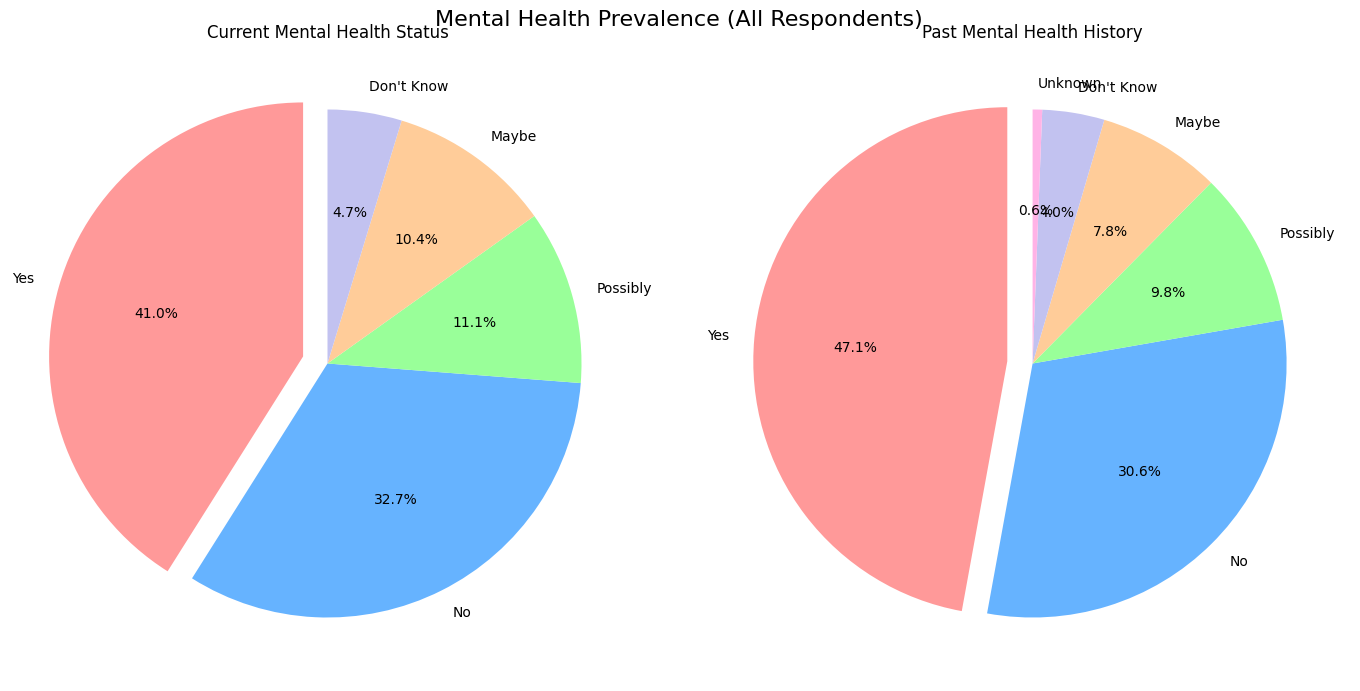

TypeError: plot_mh_pie_charts() got an unexpected keyword argument 'filter_column'

In [192]:



# Example usage:
plot_mh_pie_charts(df_encoded)  # All respondents
plot_mh_pie_charts(df_encoded, filter_column='gender', filter_values=1)  # Males only
plot_mh_pie_charts(df_encoded, filter_column='gender', filter_values=2)  # Females only
plot_mh_pie_charts(df_encoded, filter_column=['work_country','gender'], filter_values=['USA', 'UK'])  # Specific countries
plot_mh_pie_charts(df_encoded, filter_column='tech_role', filter_values=1)
plot_mh_pie_charts(df_encoded, filter_column='tech_company', filter_values=1)


Filtered work_country for ['USA', 'UK']: 2246 rows found
Filtered gender for [1]: 1491 rows found
Current MH Disorder counts: {'Yes': 606, 'No': 492, 'Maybe': 174, 'Possibly': 164, "Don't Know": 55}
Past MH Disorder counts: {'Yes': 698, 'No': 452, 'Possibly': 153, 'Maybe': 126, "Don't Know": 56, 'Unknown': 6}


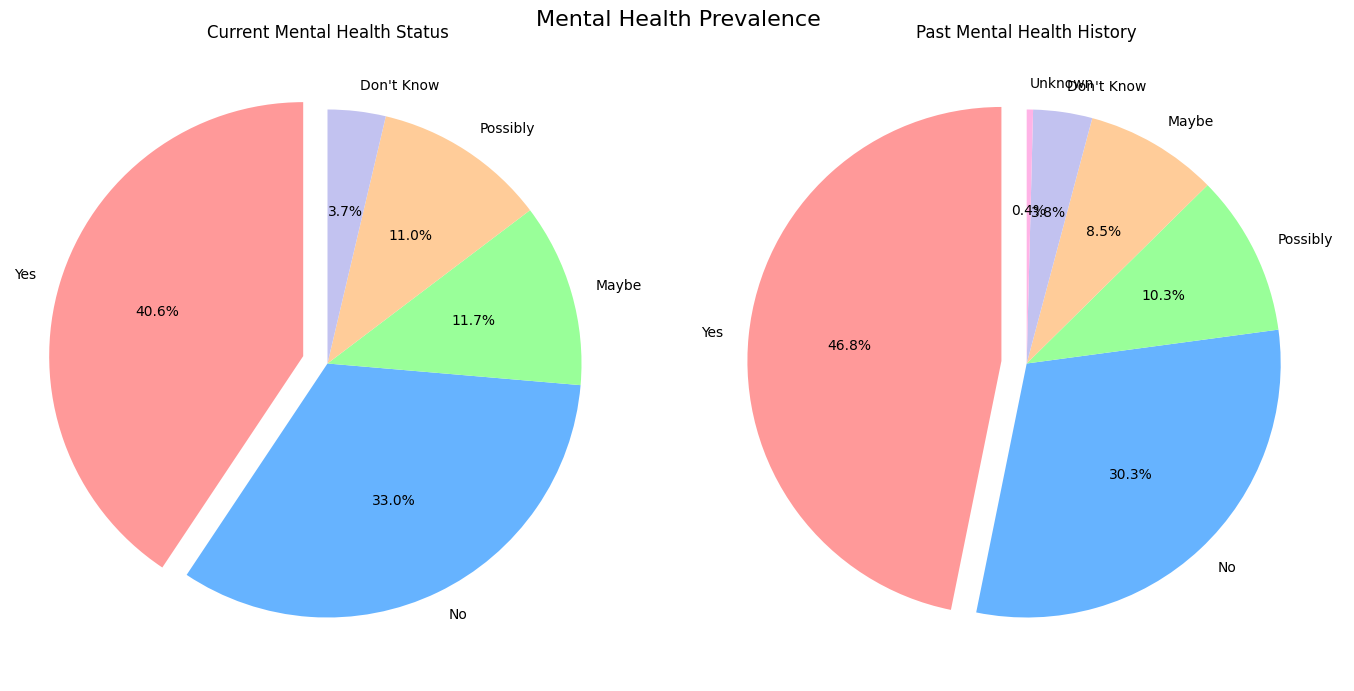

Filtered work_country for ['USA', 'UK']: 2246 rows found
Filtered gender for [1, 2]: 2170 rows found
Current MH Disorder counts: {'Yes': 998, 'No': 647, 'Possibly': 232, 'Maybe': 221, "Don't Know": 72}
Past MH Disorder counts: {'Yes': 1126, 'No': 587, 'Possibly': 202, 'Maybe': 166, "Don't Know": 79, 'Unknown': 10}


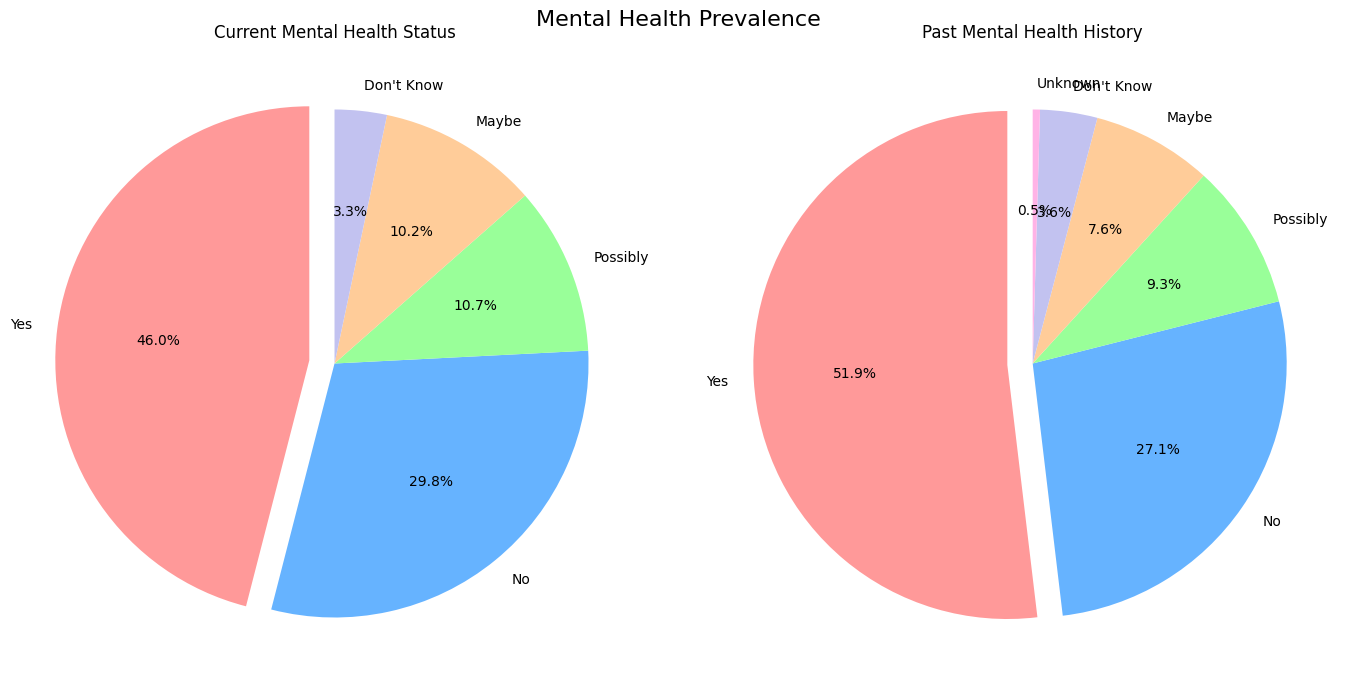

Filtered work_country for ['USA', 'UK']: 2246 rows found
Filtered gender for [2]: 679 rows found
Filtered tech_role for [1]: 311 rows found
Current MH Disorder counts: {'Yes': 179, 'No': 62, 'Possibly': 55, "Don't Know": 15}
Past MH Disorder counts: {'Yes': 183, 'No': 63, 'Possibly': 41, "Don't Know": 21, 'Unknown': 3}


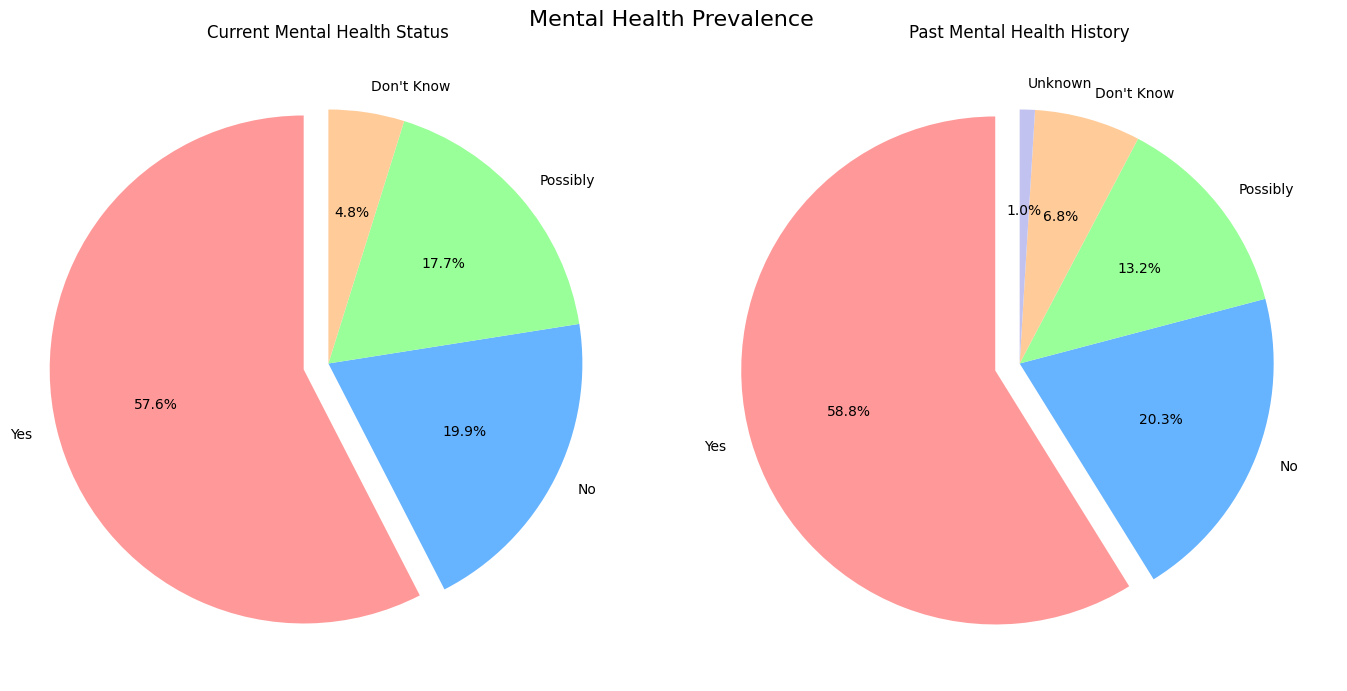

In [199]:
import matplotlib.pyplot as plt
import pandas as pd

def plot_mh_pie_charts(df, filter_columns=None):
    if filter_columns:
        for column, values in filter_columns.items():
            if values:  # Apply filter only if the list is not empty
                df = df[df[column].isin(values)]
                print(f"Filtered {column} for {values}: {df.shape[0]} rows found")  # Debugging line

    # Correct mappings based on your encoding
    current_mh_mapping = {
        0: "Don't Know",
        1: "Maybe",
        2: "No",
        3: "Possibly",
        4: "Yes"
    }
    
    past_mh_mapping = {
        0: "Don't Know",
        1: "Maybe",
        2: "No",
        3: "Possibly",
        4: "Unknown",
        5: "Yes"
    }

    # Apply mapping correctly
    df['current_mh_disorder_mapped'] = df['current_mh_disorder'].map(current_mh_mapping)
    df['past_mh_disorder_mapped'] = df['past_mh_disorder'].map(past_mh_mapping)

    # Count values after mapping
    current_counts = df['current_mh_disorder_mapped'].value_counts()
    past_counts = df['past_mh_disorder_mapped'].value_counts()

    print(f"Current MH Disorder counts: {current_counts.to_dict()}")  # Debugging line
    print(f"Past MH Disorder counts: {past_counts.to_dict()}")  # Debugging line

    # Plot pie charts with dynamic explode parameters
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 7))

    # Current MH - 5 categories
    ax1.pie(current_counts, labels=current_counts.index, autopct='%1.1f%%',
            startangle=90, colors=['#ff9999', '#66b3ff', '#99ff99', '#ffcc99', '#c2c2f0'], 
            explode=(0.1,) + (0,) * (len(current_counts)-1))
    ax1.set_title('Current Mental Health Status')

    # Past MH - 6 categories
    ax2.pie(past_counts, labels=past_counts.index, autopct='%1.1f%%',
            startangle=90, colors=['#ff9999', '#66b3ff', '#99ff99', '#ffcc99', '#c2c2f0', '#ffb3e6'], 
            explode=(0.1,) + (0,) * (len(past_counts)-1))
    ax2.set_title('Past Mental Health History')

    plt.suptitle(f'Mental Health Prevalence', fontsize=16)
    plt.tight_layout()
    plt.show()

# Example usage:
plot_mh_pie_charts(df_encoded, filter_columns={'work_country': ['USA', 'UK'], 'gender': [1]})
plot_mh_pie_charts(df_encoded, filter_columns={'work_country': ['USA', 'UK'], 'gender': [1,2]})  # Only male
plot_mh_pie_charts(df_encoded, filter_columns={'work_country': ['USA', 'UK'], 'gender': [2], 'tech_role': [1]})  # No filtering on tech_role


Filtered gender for [1]: 2176 rows found
Current MH Disorder counts: {'No': 791, 'Yes': 770, 'Maybe': 261, 'Possibly': 242, "Don't Know": 112}
Past MH Disorder counts: {'Yes': 910, 'No': 749, 'Possibly': 225, 'Maybe': 193, "Don't Know": 89, 'Unknown': 10}


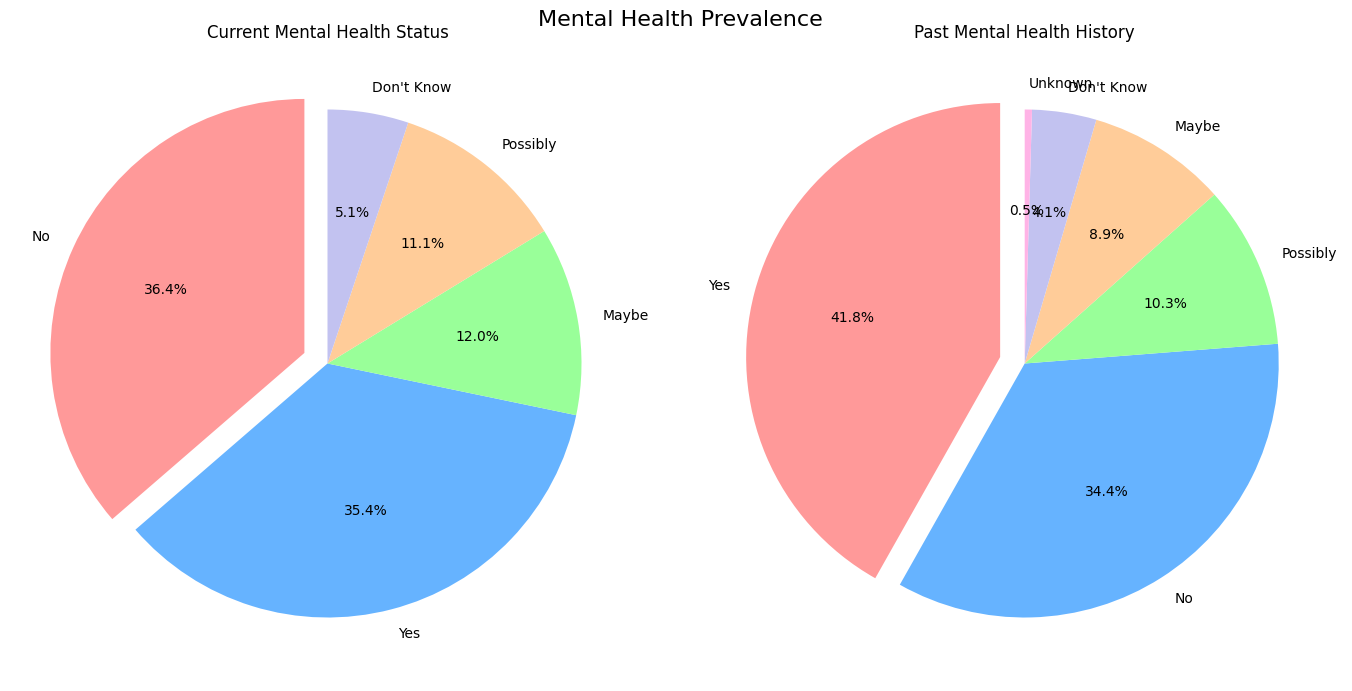

In [202]:
plot_mh_pie_charts(df_encoded, filter_columns={'gender': [1]})  # No filtering on tech_role


In [197]:
check_unique(df_encoded)

 self_employed   ===      [0 1]

 company_size   ===      [3. 2. 0. 6. 4. 5. 1.]

 tech_company   ===      [1 0]

 mh_benefits   ===      [2 1 3 4 0]

 mh_discussed   ===      [1 3 2 0]

 prev_mh_options_aware   ===      [0 2 1]

 past_mh_disorder   ===      [5 1 2 3 4 0]

 current_mh_disorder   ===      [2 4 1 3 0]

 age   ===      [39. 29. 38. 43. 42. 30. 37. 44. 28. 34. 35. 52. 32. 25. 31. 26. 33. 27.
 36. 40. 46. 41. 45. 19. 21. 24. 18. 23. 22. 51. 48. 55. 50. 49. 20. 54.
 47. 56. 57. 63. 80. 61. 62. 53. 58. 66. 59. 65. 74. 70. 64. 60. 67. nan]

 gender   ===      [1 2 0]

 work_country   ===      ['UK' 'USA' 'Canada' 'Germany' 'Netherlands' 'Czech Republic' 'Lithuania'
 'Australia' 'France' 'Venezuela' 'Poland' 'Belgium' 'Brazil' 'Denmark'
 'Sweden' 'Russia' 'Spain' 'India' 'UAE' 'Mexico' 'Switzerland' 'Norway'
 'Argentina' 'Ireland' 'Italy' 'Finland' 'Turkey' 'Colombia' 'Costa Rica'
 'Vietnam' 'Bulgaria' 'New Zealand' 'South Africa' 'Slovakia' 'Austria'
 'Bangladesh' 'Pakistan' '

In [187]:
def plot_industry_support_hist(df, filter_column=None, filter_values=None, bins=10):
    if filter_column and filter_values is not None:
        if not isinstance(filter_values, list):
            filter_values = [filter_values]
        df = df[df[filter_column].isin(filter_values)]
        print(f"Filtered {filter_column} for {filter_values}: {df.shape[0]} rows found")  # Debugging line
        title_suffix = f" ({filter_column}: {', '.join(map(str, filter_values))})"
    else:
        title_suffix = " (All Respondents)"
    
    plt.figure(figsize=(10, 6))
    sns.histplot(df['industry_support_rating'], bins=bins, kde=True, color='skyblue', edgecolor='black')
    
    plt.xlabel("Industry Support Rating")
    plt.ylabel("Count")
    plt.title(f"Distribution of Industry Support Rating{title_suffix}")
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()


In [209]:
def plot_industry_support_hist(df, filter_columns=None, bins=10):
    title_suffix = ""
    if filter_columns:
        for column, values in filter_columns.items():
            if values:  # Apply filter only if the list is not empty
                df = df[df[column].isin(values)]
                print(f"Filtered {column} for {values}: {df.shape[0]} rows found")  # Debugging line
              
    else:
        title_suffix = " (All Respondents)"
    
    plt.figure(figsize=(10, 6))
    sns.histplot(df['industry_support_rating'], bins=bins, kde=True, color='skyblue', edgecolor='black')
    
    plt.xlabel("Industry Support Rating")
    plt.ylabel("Count")
    plt.title(f"Distribution of Industry Support Rating   {title_suffix}")
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()


Filtered work_country for ['USA', 'UK']: 2246 rows found
Filtered gender for [1]: 1491 rows found


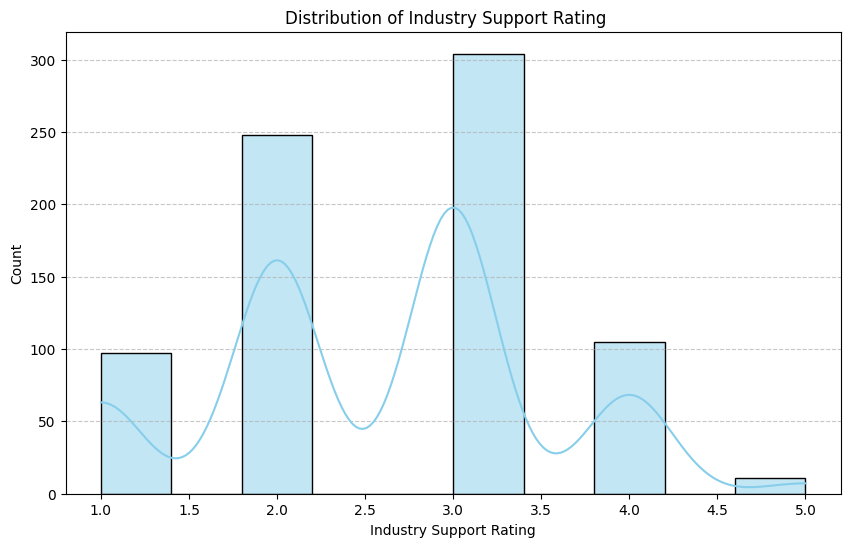

In [210]:
plot_industry_support_hist(df_encoded, filter_columns={'work_country': ['USA', 'UK'], 'gender': [1]})

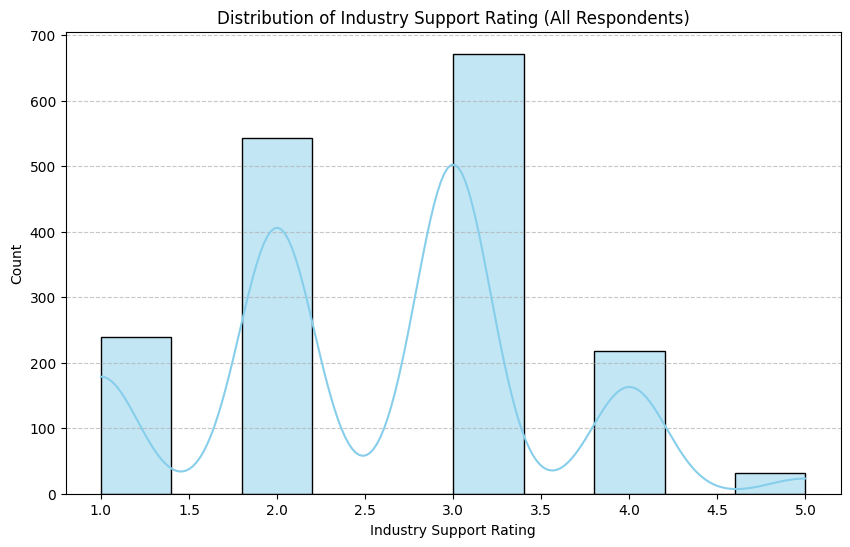

Filtered gender for [1]: 2176 rows found


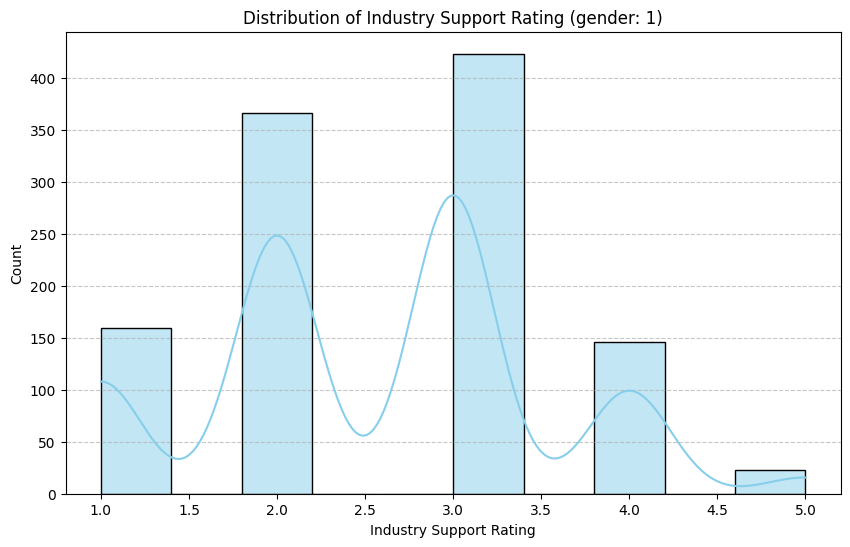

Filtered gender for [2]: 855 rows found


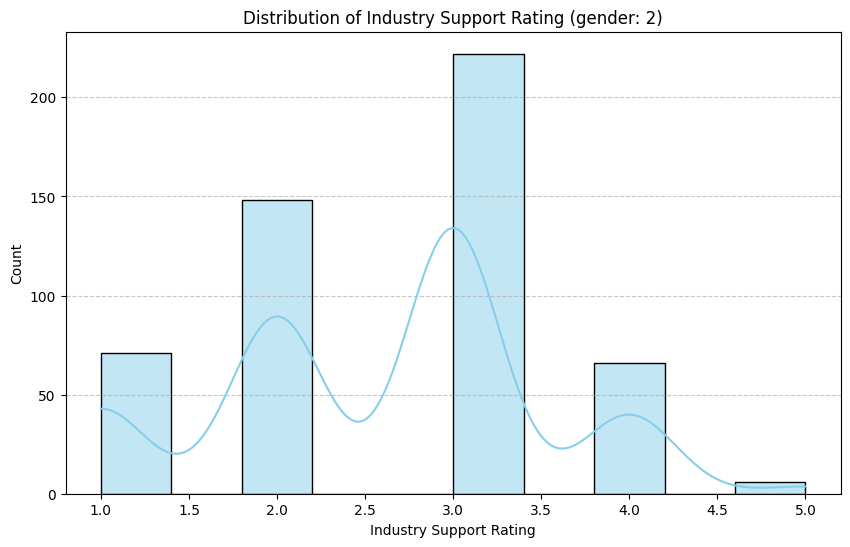

Filtered work_country for ['USA', 'UK']: 2246 rows found


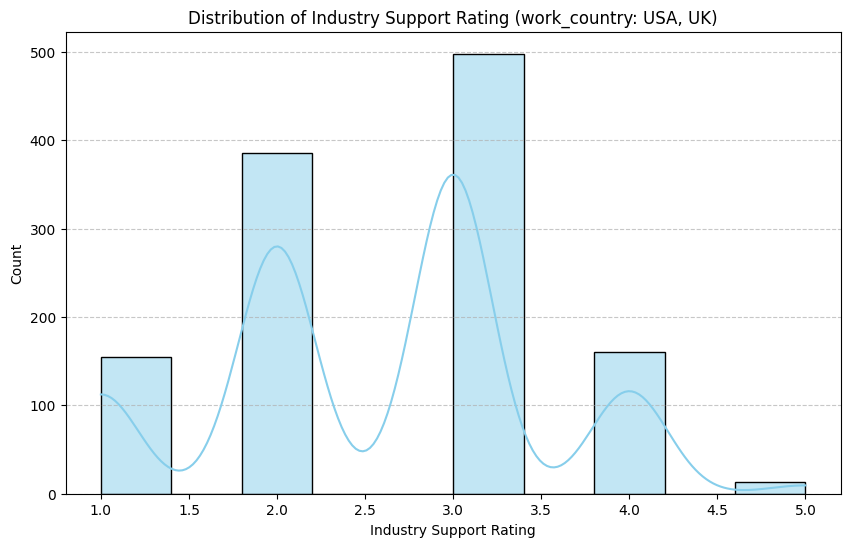

In [154]:

plot_industry_support_hist(df_encoded)
plot_industry_support_hist(df_encoded, filter_column='gender', filter_values=1)  # Males only
plot_industry_support_hist(df_encoded, filter_column='gender', filter_values=2)  # Females only
plot_industry_support_hist(df_encoded, filter_column='work_country', filter_values=['USA', 'UK']) 


In [172]:
def plot_industry_support_trend(df, filter_column=None, filter_values=None):
    if filter_column and filter_values is not None:
        if isinstance(filter_values, list) and len(filter_values) == 2 and filter_column == "age":
          
            df = df[(df['age'] >= filter_values[0]) & (df['age'] <= filter_values[1])]
            title_suffix = f" (Ages {filter_values[0]} - {filter_values[1]})"
        else:
            if not isinstance(filter_values, list):
                filter_values = [filter_values]
            df = df[df[filter_column].isin(filter_values)]
            title_suffix = f" ({filter_column}: {', '.join(map(str, filter_values))})"
    else:
        title_suffix = " (All Respondents)"

  
    trend_data = df.groupby("year")["industry_support_rating"].mean().reset_index()

    # Plot
    plt.figure(figsize=(10, 6))
    sns.lineplot(data=trend_data, x="year", y="industry_support_rating", marker="o", linewidth=2.5)

    # Labels & Title
    plt.xlabel("Year")
    plt.ylabel("Average Industry Support Rating")
    plt.title(f"Trend of Industry Support Rating Over Years{title_suffix}", fontsize=14)
    plt.grid(True)
    
    plt.show()


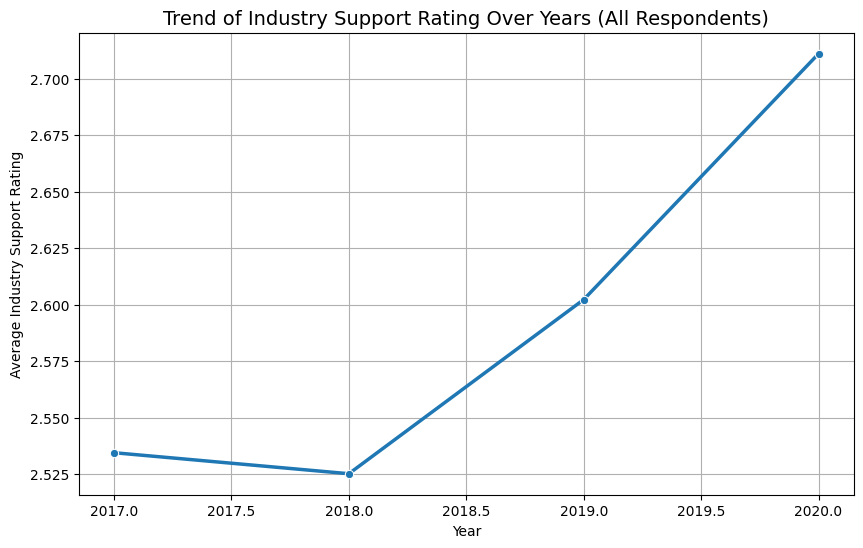

In [173]:

plot_industry_support_trend(df_encoded)


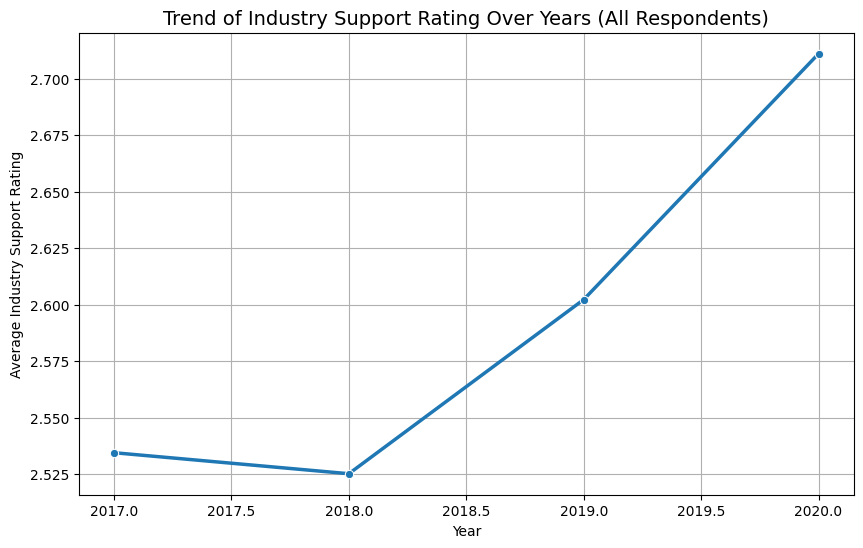

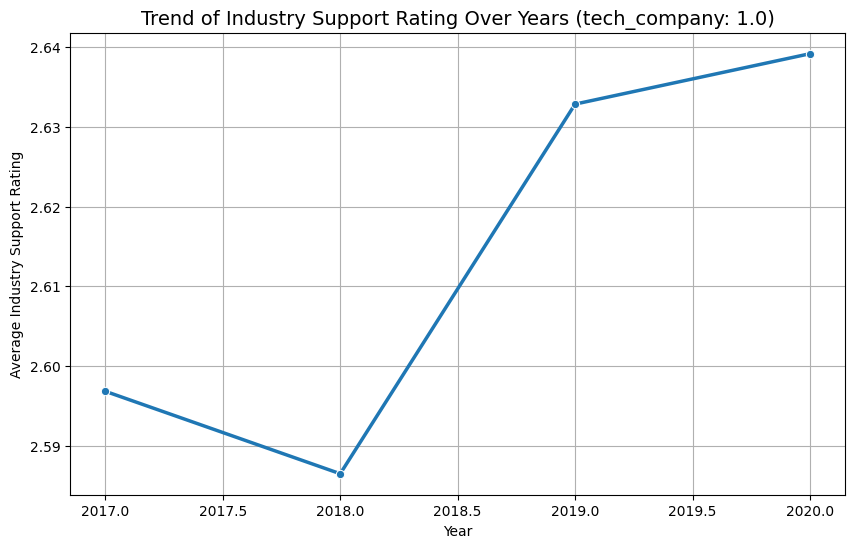

In [177]:
plot_industry_support_trend(df_encoded, filter_column='gender')  # Trend for males
plot_industry_support_trend(df_encoded, filter_column='tech_company', filter_values=1.0)  # Trend for tech company employees




# Trend By Country

In [ ]:
def plot_trend_by_country(df, column, selected_countries=None):
   
    
   
    trend_data = df.groupby(["year", "work_country"])[column].mean().unstack()
    
    if selected_countries:
        trend_data = trend_data[selected_countries]
    

    plt.figure(figsize=(12, 6))
    trend_data.plot(kind="line", marker="o", ax=plt.gca())
    
    plt.title(f"Trend of {column} Over Years by Country")
    plt.xlabel("Year")
    plt.ylabel(f"Average {column}")
    plt.legend(title="Country", bbox_to_anchor=(1.05, 1), loc="upper left")
    plt.grid(True)
    plt.show()



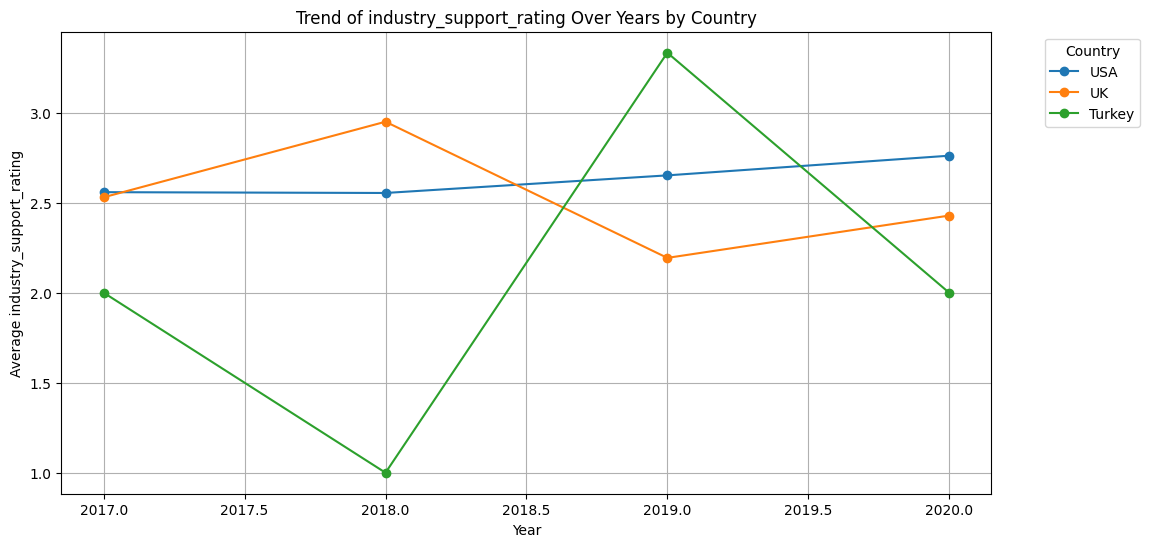

In [181]:
plot_trend_by_country(final_df, "industry_support_rating", ["USA", "UK","Turkey"])




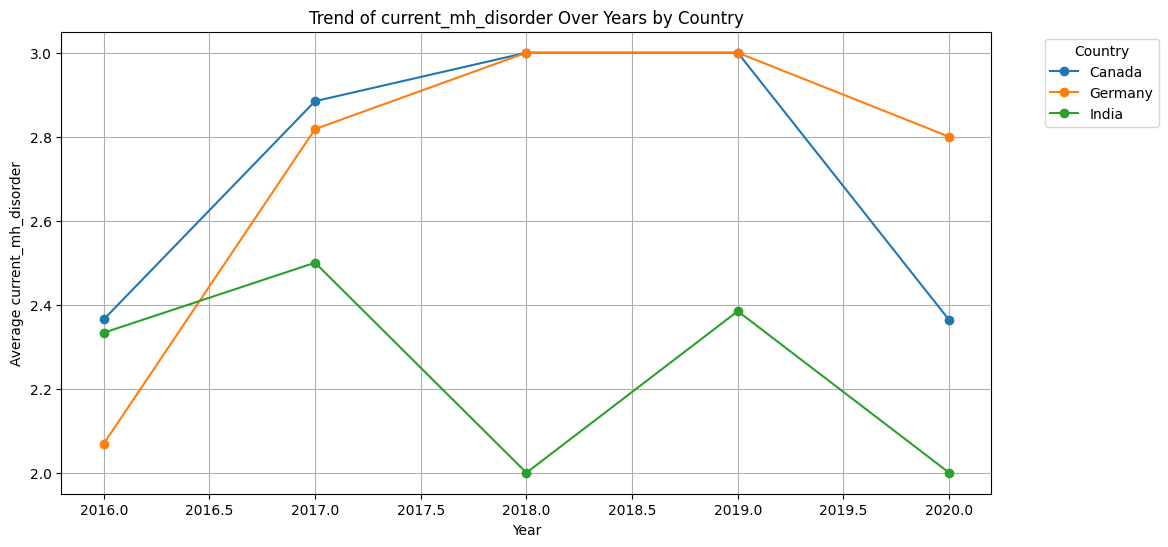

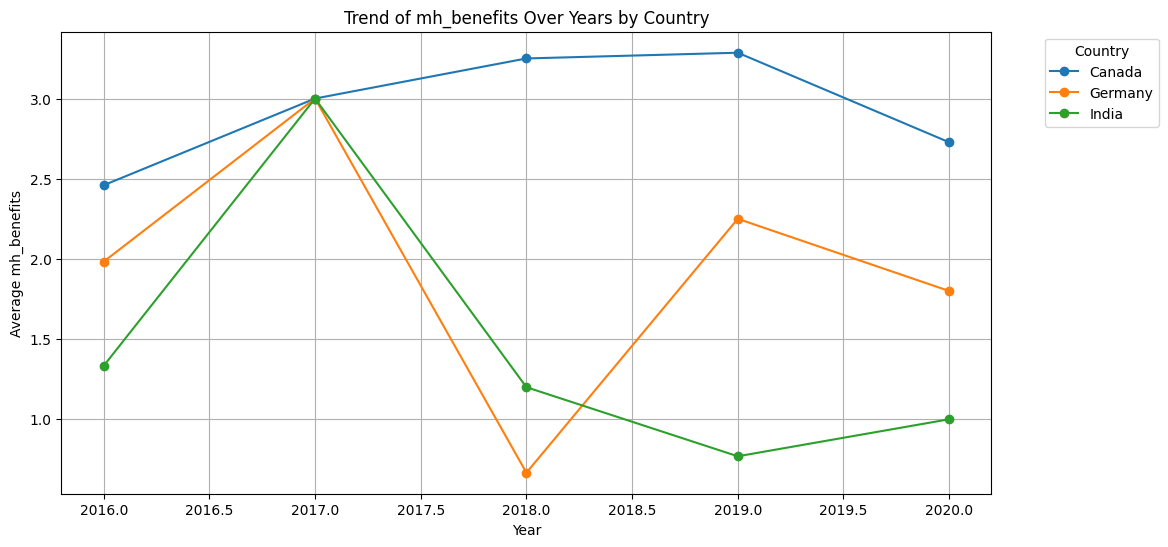

In [ ]:
plot_trend_by_country(df_encoded, "current_mh_disorder", ["Canada", "Gerfmany", "India"])
plot_trend_by_country(df_encoded, "mh_benefits",["Canada", "Germany", "India"])

In [211]:
df_encoded.to_csv("df_encoded.csv")